# Introduction

#### In this project, we will be using probability and statistics to analyze data from the English Premier League. We will collect data on various aspects of the league, such as goals scored, assists, yellow cards, red cards, etc., and use statistical methods to analyze this data and draw conclusions about the league. The project will provide a comprehensive analysis of the English Premier League using probability and statistics.

### Analyzing the Dataset

In [2]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading Dataset

epl_df = pd.read_csv('EPL_20_21.csv')
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [6]:
epl_df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [7]:
#Creating new columns (Minutes per Match & Goals per Match)

epl_df['MinsPerMatch'] = (epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch'] = (epl_df['Goals']/epl_df['Matches']).astype(float)
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


# Goals Analysis

In [8]:
# Total Gaols

Total_Goals = epl_df['Goals'].sum()
print(Total_Goals)

986


In [9]:
# Penalty Goals

Total_PenaltyGoals = epl_df['Penalty_Goals'].sum()
print(Total_PenaltyGoals)

102


In [10]:
# Penalty Attempts

Total_PenaltyAttemps = epl_df['Penalty_Attempted'].sum()
print(Total_PenaltyAttemps)

125


## Penalty Scored VS Penalty Missed (Pie Chart)

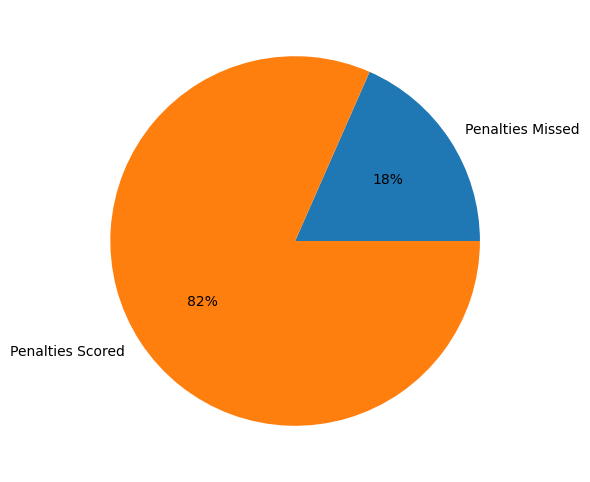

In [11]:
plt.figure(figsize=(13,6))
pl_not_scored = epl_df['Penalty_Attempted'].sum() - Total_PenaltyGoals
data = [pl_not_scored, Total_PenaltyGoals]
labels = ['Penalties Missed', 'Penalties Scored']
color = sns.color_palette("tab10")
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

## Position And Nationality Analysis

In [12]:
# Unique Positons

epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [13]:
# Total FW Players

epl_df[epl_df['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [14]:
# Players from different nations

np.size((epl_df['Nationality'].unique()))

59

## Top 10 Nationalities (Bar Graph)

<Axes: xlabel='Nationality'>

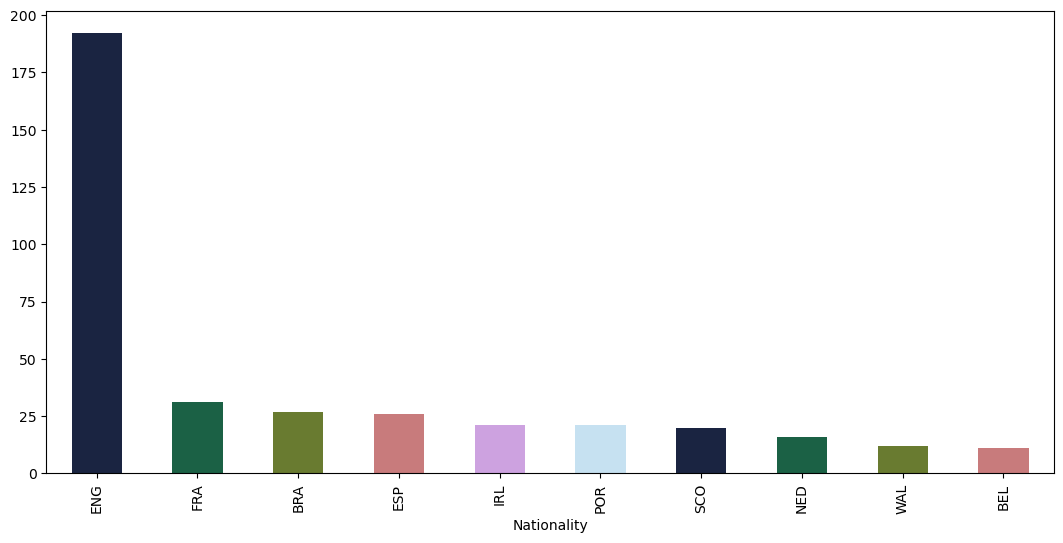

In [15]:
# Most players from which countries

nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(10).plot(kind = 'bar', figsize=(13,6), color = sns.color_palette("cubehelix"))

## Clubs with Maximum Players (Bar Chart)

<Axes: >

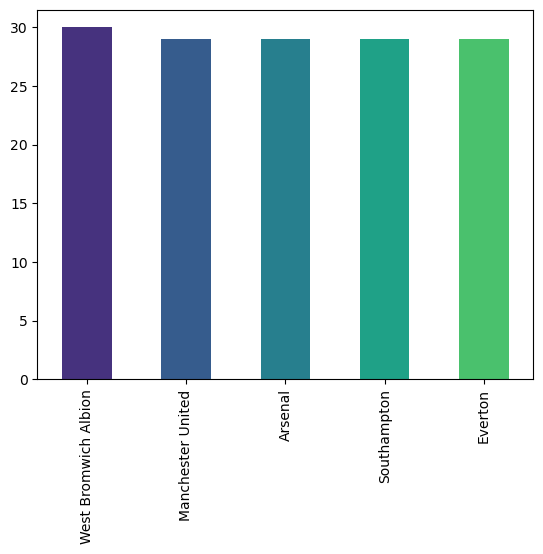

In [16]:
# Clubs with maximum players in their squad

epl_df['Club'].value_counts().nlargest(5).plot(kind ='bar', color= sns.color_palette("viridis"))

## Clubs with Least Players (Bar Chart)

<Axes: >

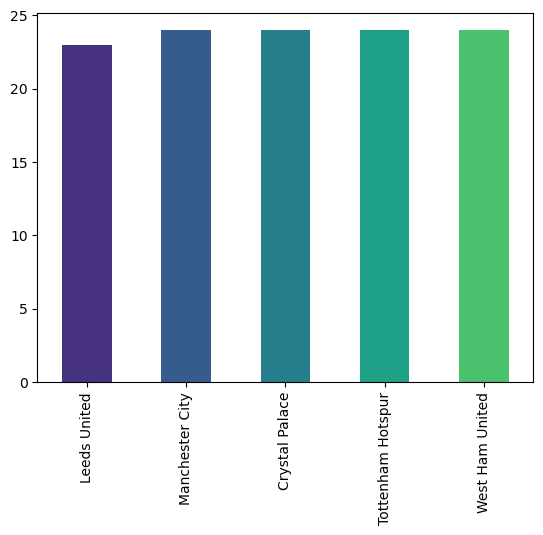

In [17]:
epl_df['Club'].value_counts().nsmallest(5).plot(kind ='bar', color= sns.color_palette("viridis"))

## Player Age Analysis

In [18]:
# Players based on age group

Under20 = epl_df[epl_df['Age'] <= 20]
age20_25 = epl_df[(epl_df['Age'] > 20) &(epl_df['Age'] <= 25)]
age25_30 = epl_df[(epl_df['Age'] > 25) &(epl_df['Age'] <= 30)]
Above30 = epl_df[epl_df['Age']>30]

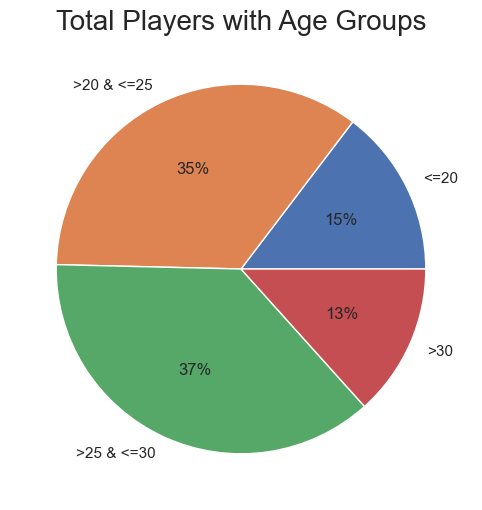

In [77]:
x = np.array([Under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),Above30['Name'].count()])
mylabels = ['<=20','>20 & <=25', '>25 & <=30','>30']
plt.figure(figsize=(13,6))
plt.title("Total Players with Age Groups", fontsize = 20)
plt.pie(x, labels = mylabels, autopct ="%.0f%%")
plt.show()

Text(0.5, 1.0, 'Clubs with most Youngsters')

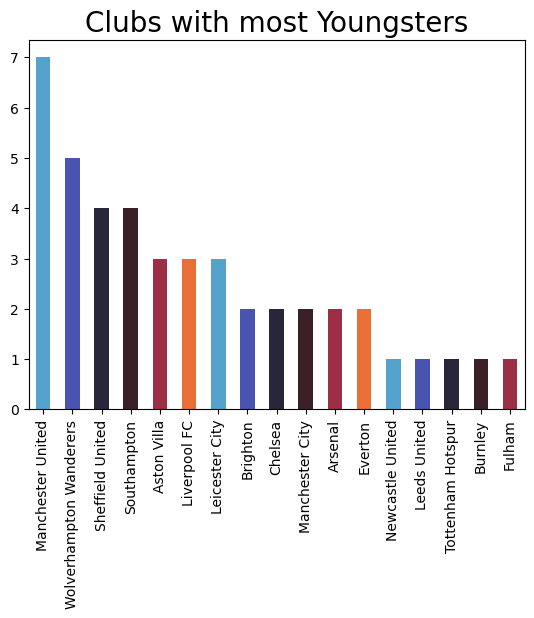

In [20]:
# Total under 20 players in each club

players_under_20 = epl_df[epl_df['Age'] < 20]
players_under_20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette("icefire"))
plt.title("Clubs with most Youngsters", fontsize = 20)

In [21]:
# Under 20 Players from Manchester Utd

players_under_20[players_under_20['Club'] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [22]:
# Under 20 Players from Chelsea 

players_under_20[players_under_20['Club'] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


Text(0.5, 1.0, 'Average Age of Players in Each Club')

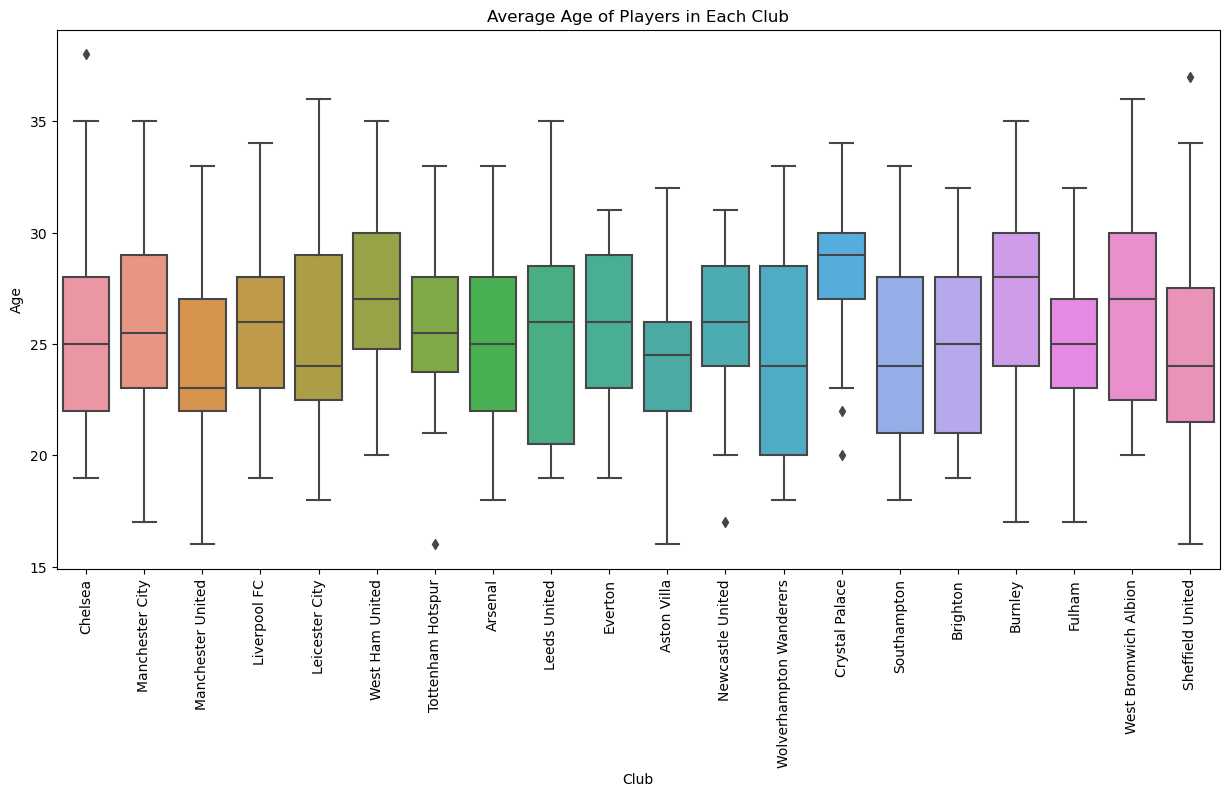

In [24]:
# Average age of players in each club

plt.figure(figsize=(15,7))
sns.boxplot(x = 'Club', y= 'Age', data = epl_df)
plt.xticks(rotation = 90)
plt.title("Average Age of Players in Each Club")

In [26]:
num_player = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum())/num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

## Assists From Clubs Analysis


Text(0.5, 1.0, 'Plot of clubs vs Total Assists ')

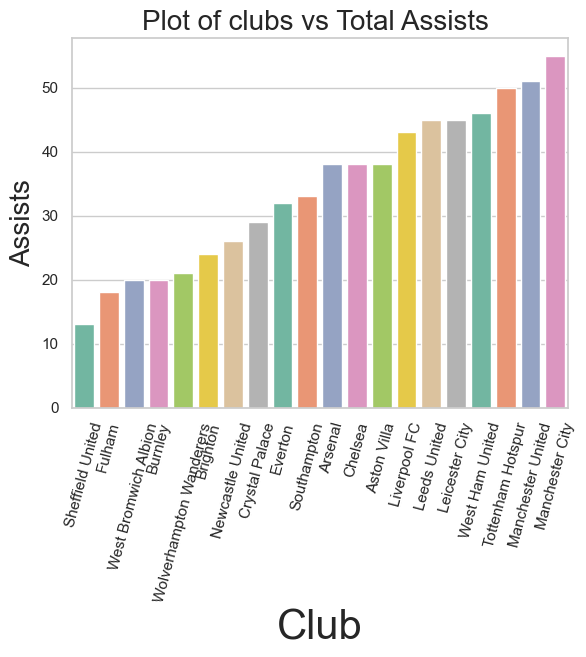

In [34]:
# Total assists from each club

Assists_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.barplot(x= 'Club',y='Assists',data=Assists_by_clubs. sort_values(by="Assists") ,palette='Set2')
ax.set_xlabel ("Club", fontsize=30) 
ax. set_ylabel ("Assists", fontsize=20)
plt.xticks (rotation=75)
plt.rcParams ["figure.figsize"] = (20,8)
plt.title('Plot of clubs vs Total Assists ',fontsize = 20)

## Top 10 Assists

In [35]:
# Top 10 Assists

top_10_assists = epl_df[['Name','Club', 'Assists', 'Matches']].nlargest(n=10, columns = 'Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


## Goals From Clubs Analysis

Text(0.5, 1.0, 'Plot of Clubs vs Total Goals')

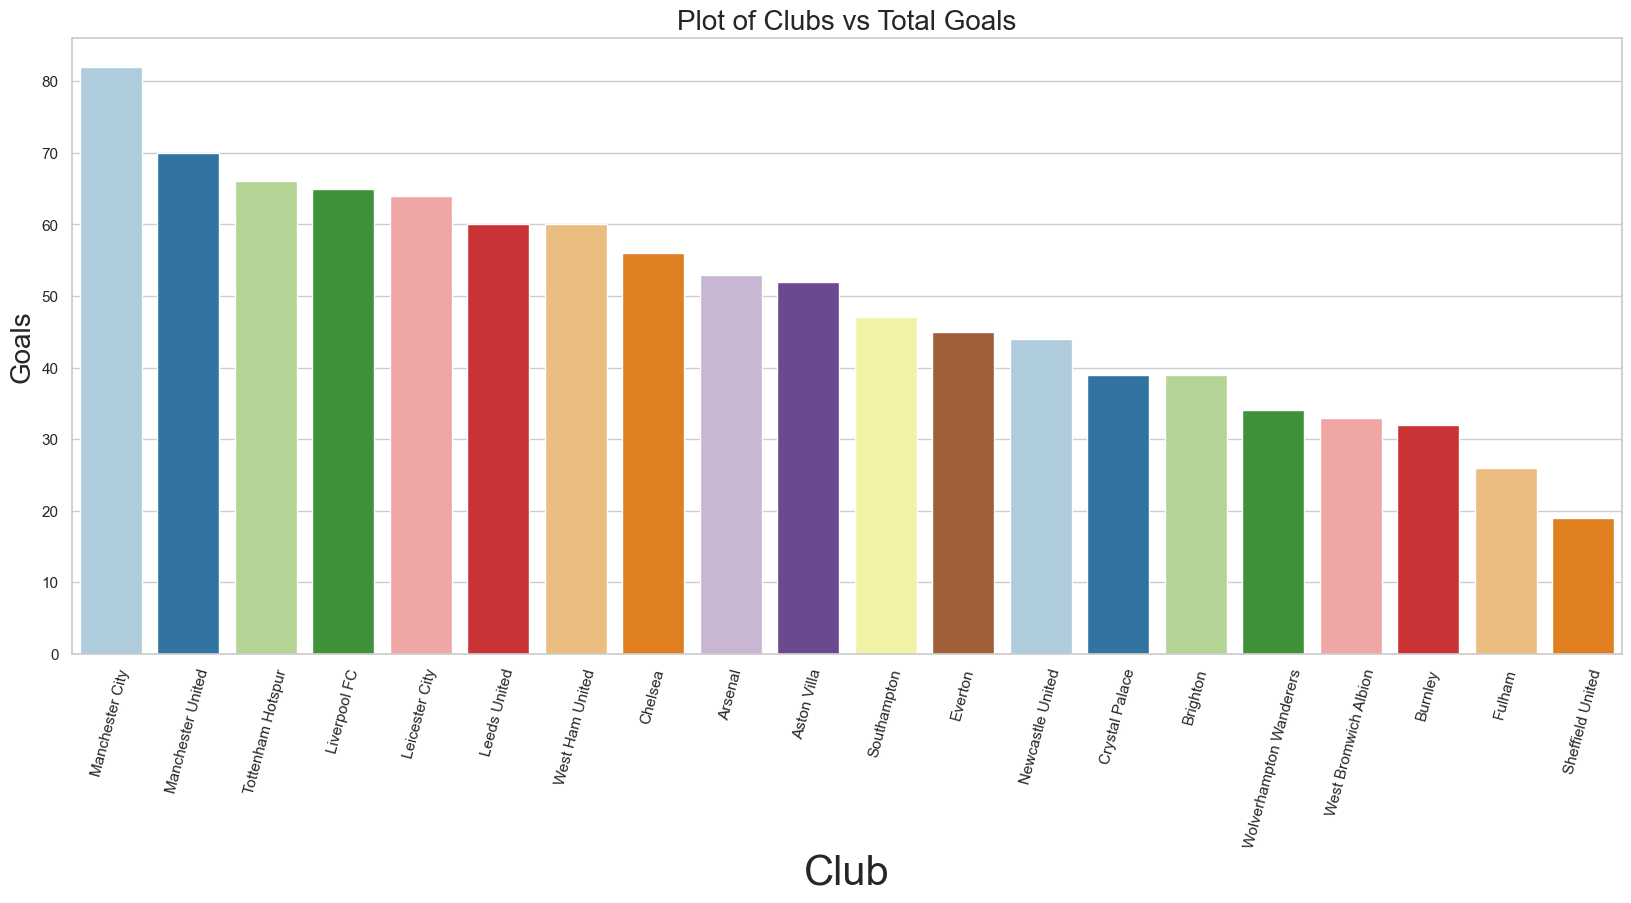

In [50]:
Goals_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index = False)['Goals'].sum())
sns.set_theme(style='whitegrid',color_codes = True)
ax = sns.barplot(x='Club', y='Goals', data=Goals_by_clubs.sort_values(by='Goals',ascending = False),palette="Paired")
ax.set_xlabel("Club",fontsize = 30)
ax.set_ylabel("Goals",fontsize = 20)
plt.xticks(rotation = 75)
plt.rcParams ["figure.figsize"] = (20,8)
plt.title("Plot of Clubs vs Total Goals", fontsize = 20)

### Most Goals By Players (Top Scorer)

In [52]:
# Most Goals by Players

top_10_goals = epl_df[['Name', 'Club', 'Goals', 'Matches']].nlargest(n=10, columns='Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [54]:
# Goals per Match

top_10_goals_per_match = epl_df[['Name', 'GoalsPerMatch', 'Matches', 'Goals']].nlargest(n=10, columns='GoalsPerMatch')
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


### Pie Chart - Goals with Assist and Without Assist

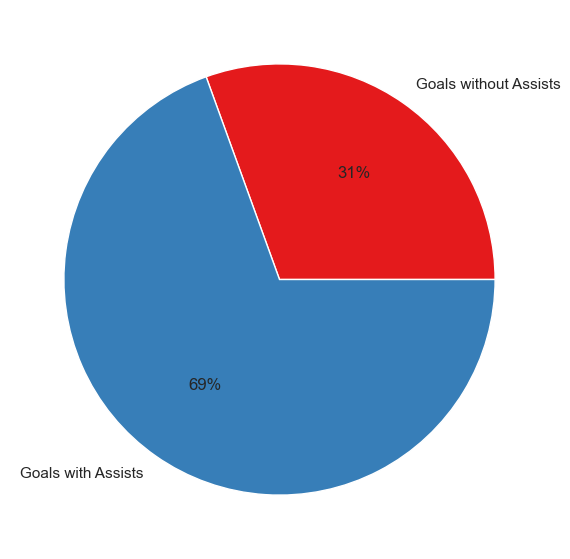

In [66]:
# Goals with Assists and without Assists

plt.figure(figsize = (14,7))
assists = epl_df['Assists'].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals without Assists', 'Goals with Assists']
color = sns.color_palette("Set1")
plt.pie(data, labels = labels, colors = color, autopct= '%.0f%%')
plt.show()

## Disciplinary Analysis


### Top 10 Players with Most Yellow Cards

<Axes: title={'center': 'Players with the most Yellow Cards'}, xlabel='Name', ylabel='Number of Yellow Cards'>

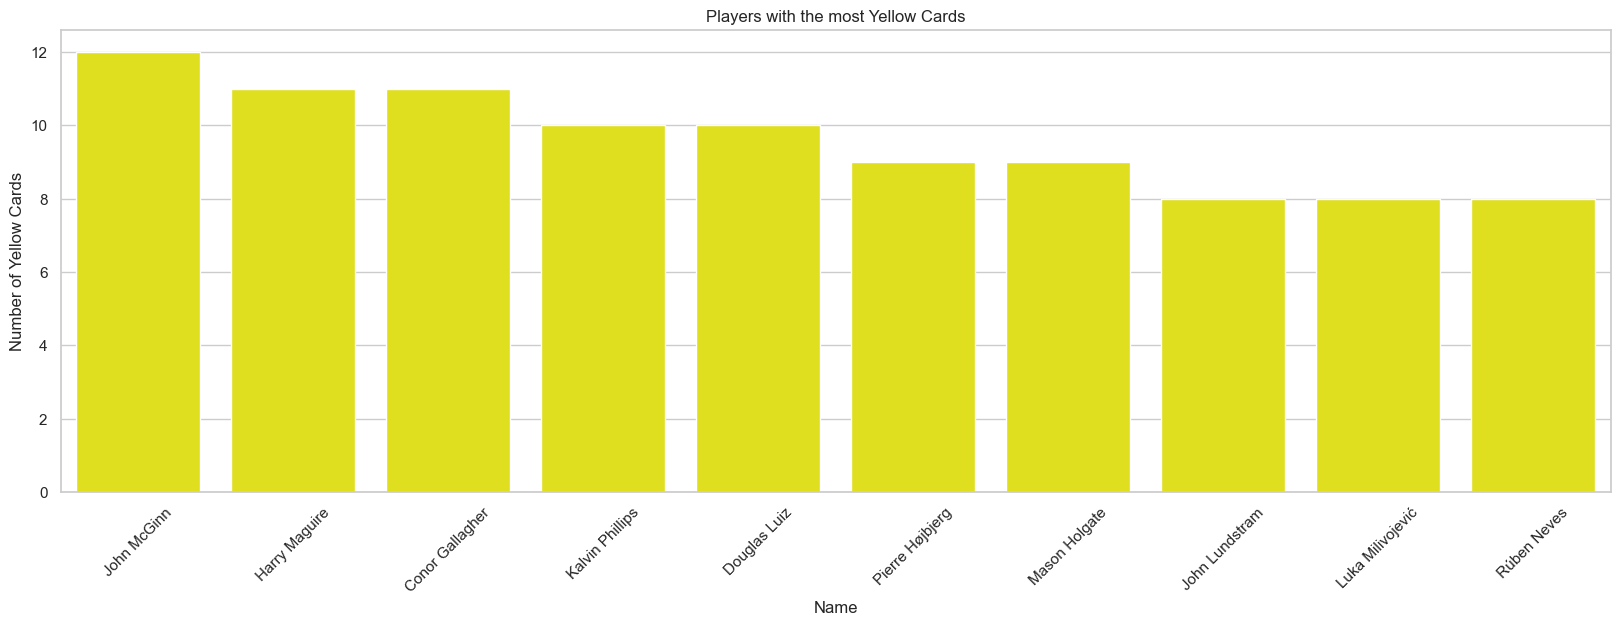

In [72]:
# Top 10 Players with the most Yellow Cards

epl_yellow=epl_df.sort_values(by = 'Yellow_Cards', ascending = False)[:10]
plt.figure(figsize=(20,6))
plt.title("Players with the most Yellow Cards")
c=sns.barplot(x=epl_yellow['Name'], y=epl_yellow['Yellow_Cards'], label='Players', color= 'Yellow')
plt.ylabel("Number of Yellow Cards")
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c

### Top 10 Players with Most Red Cards


<Axes: title={'center': 'Players with the most Red Cards'}, xlabel='Name', ylabel='Number of Red Cards'>

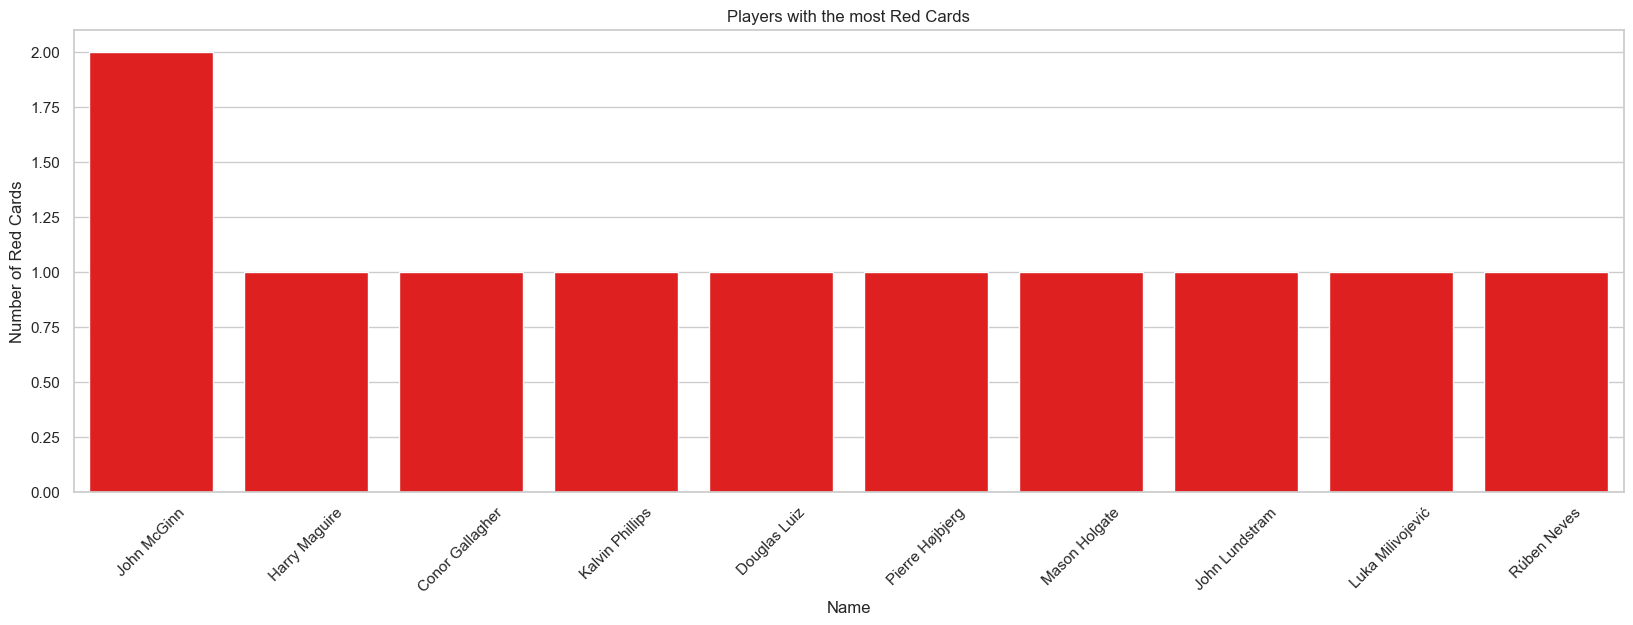

In [73]:
# Top 10 Players with the most Red Cards

epl_red=epl_df.sort_values(by = 'Red_Cards', ascending = False)[:10]
plt.figure(figsize=(20,6))
plt.title("Players with the most Red Cards")
d=sns.barplot(x=epl_red['Name'], y=epl_red['Red_Cards'], label='Players', color= 'Red')
plt.ylabel("Number of Red Cards")
d.set_xticklabels(d.get_xticklabels(),rotation=45)
d

## Top Players with Best Passing Accuracy

<Axes: title={'center': 'Players with the best Passing Accuracy'}, xlabel='Name', ylabel='Pass Percentage'>

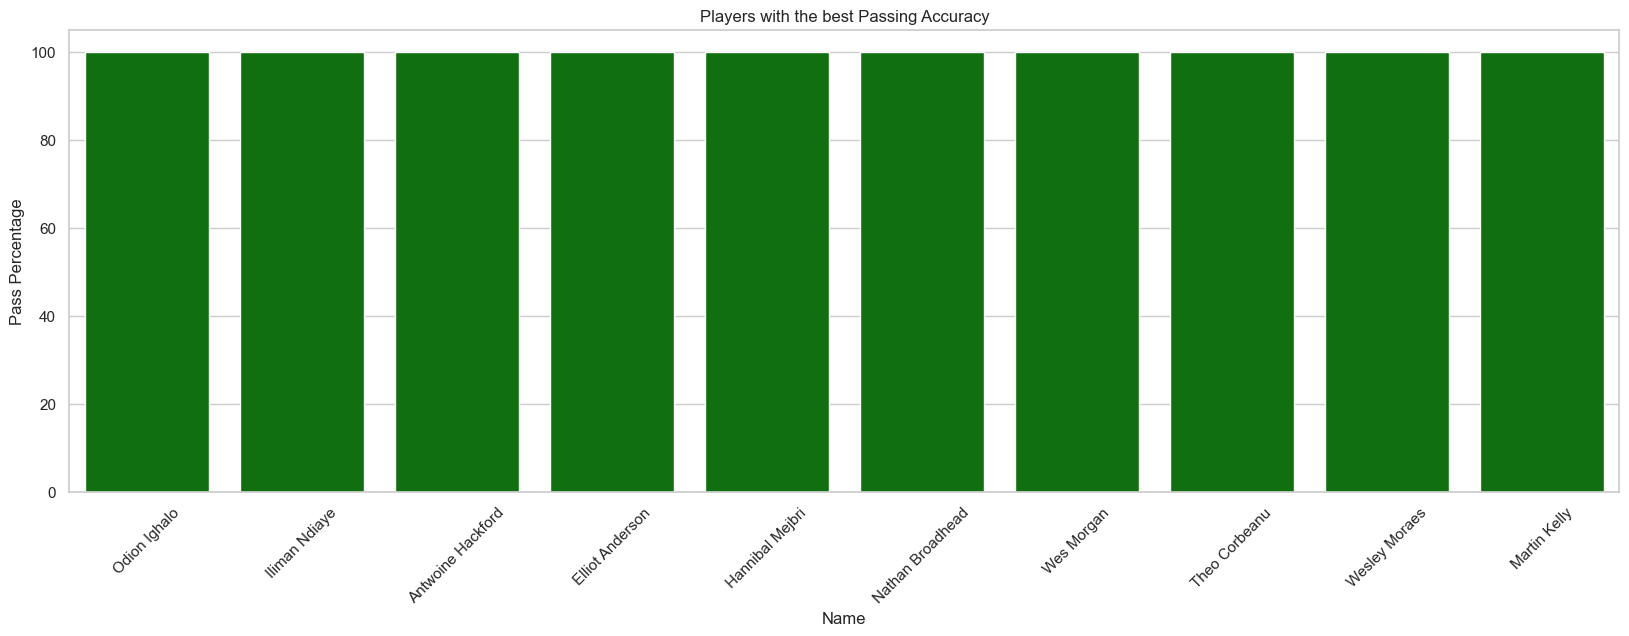

In [76]:
# Top 10 Players with the best Passing Accuracy

epl_pa=epl_df.sort_values(by = 'Perc_Passes_Completed', ascending = False)[:10]
plt.figure(figsize=(20,6))
plt.title("Players with the best Passing Accuracy")
e=sns.barplot(x=epl_pa['Name'], y=epl_pa['Perc_Passes_Completed'], label='Players', color= 'Green')
plt.ylabel("Pass Percentage")
e.set_xticklabels(e.get_xticklabels(),rotation=45)
e